# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Time series prediction with multilayer perceptrons & LSTM



# Import modules

In [13]:
import matplotlib.pyplot as plt
import math, pandas, numpy, os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
import pandas as pd

rcParams['figure.figsize'] = 17, 8
rcParams['font.size'] = 20
import tensorflow as tf

In [2]:
"""
https://github.com/tensorflow/models/issues/9706
I had an issue with the numpy version
I add to donwgrade it and install
pip install numpy==1.19.5
"""

'\nhttps://github.com/tensorflow/models/issues/9706\nI had an issue with the numpy version\nI add to donwgrade it and install\npip install numpy==1.19.5\n'

In [2]:
def set_seed(seed = 31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# Import dataset


- You can see an upward trend in the plot. You can also see some periodicity to the dataset.
- Normally, it is a good idea to investigate various data preparation techniques to rescale the data and to make it stationary.
- **ATTENTION** We are not going to make the series stationary just to see what we can do.



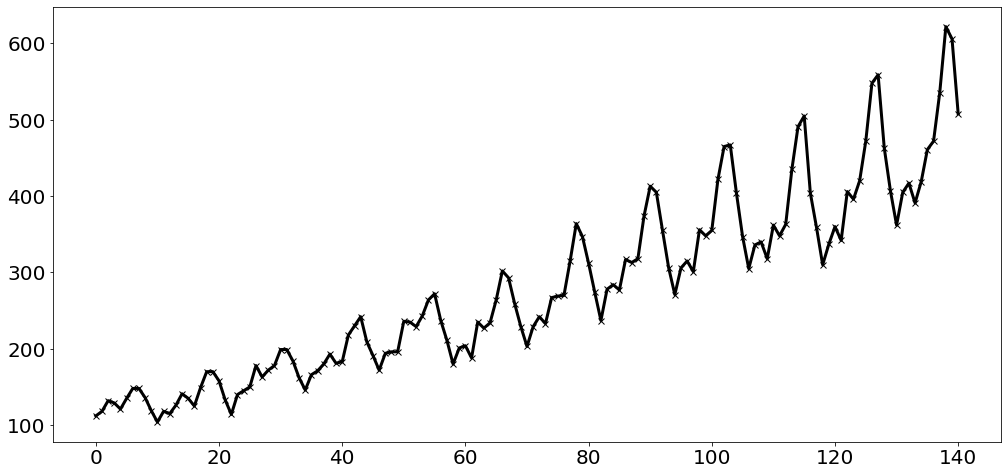

In [4]:
def getDataset():    
    dataset = pandas.read_csv("../../DATASETS/airline-passengers.csv" , usecols=[1], engine= "python" , skipfooter=3)
    dataset = dataset.values
    dataset = dataset.astype("float32")
    return dataset

dataset = getDataset()
plt.plot(dataset, "kx-", lw = 3)
plt.show()

In [14]:
pd.DataFrame(dataset)

,0
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0
...,...
136,472.0
137,535.0
138,622.0
139,606.0


# Multilayer Perceptron Regression


- We will turn the time series prediction problem into a regression problem. 
- That is, given the number of passengers (in units of thousands) this month, what is the number of passengers next month. 
- We can write a simple function to convert our single column of data into a two-column dataset. 
- The first column containing **this month’s (t)** passenger count and the second column containing **next month’s (t+1)** passenger count, to be predicted.



In [17]:
dataset = getDataset()

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

94 47


In [18]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [15]:
testY

array([306., 315., 301., 356., 348., 355., 422., 465., 467., 404., 347.,
       305., 336., 340., 318., 362., 348., 363., 435., 491., 505., 404.,
       359., 310., 337., 360., 342., 406., 396., 420., 472., 548., 559.,
       463., 407., 362., 405., 417., 391., 419., 461., 472., 535., 622.,
       606.], dtype=float32)

In [16]:
testX

array([[271.],
       [306.],
       [315.],
       [301.],
       [356.],
       [348.],
       [355.],
       [422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.]], dtype=float32)

In [7]:
# create and fit Multilayer Perceptron model using KERAS
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= "relu"))
model.add(Dense(1))
model.compile(loss= "mean_squared_error" , optimizer= "adam")
model.fit(trainX, trainY, epochs = 200, batch_size=2, verbose=2)

Epoch 1/200
46/46 - 11s - loss: 940.0981
Epoch 2/200
46/46 - 0s - loss: 528.3158
Epoch 3/200
46/46 - 0s - loss: 516.3282
Epoch 4/200
46/46 - 0s - loss: 512.3242
Epoch 5/200
46/46 - 0s - loss: 520.3903
Epoch 6/200
46/46 - 0s - loss: 518.9435
Epoch 7/200
46/46 - 0s - loss: 516.8735
Epoch 8/200
46/46 - 0s - loss: 521.3627
Epoch 9/200
46/46 - 0s - loss: 512.9954
Epoch 10/200
46/46 - 0s - loss: 513.1881
Epoch 11/200
46/46 - 0s - loss: 514.5287
Epoch 12/200
46/46 - 0s - loss: 528.7532
Epoch 13/200
46/46 - 0s - loss: 543.7563
Epoch 14/200
46/46 - 0s - loss: 512.6999
Epoch 15/200
46/46 - 0s - loss: 516.3381
Epoch 16/200
46/46 - 0s - loss: 521.9644
Epoch 17/200
46/46 - 0s - loss: 515.8702
Epoch 18/200
46/46 - 0s - loss: 518.3246
Epoch 19/200
46/46 - 0s - loss: 516.7169
Epoch 20/200
46/46 - 0s - loss: 524.7180
Epoch 21/200
46/46 - 0s - loss: 521.2849
Epoch 22/200
46/46 - 0s - loss: 519.2211
Epoch 23/200
46/46 - 0s - loss: 519.3038
Epoch 24/200
46/46 - 0s - loss: 515.4796
Epoch 25/200
46/46 - 0s 

Epoch 199/200
46/46 - 0s - loss: 507.1541
Epoch 200/200
46/46 - 0s - loss: 514.9826


In [8]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print("Train Score: %.2f MSE (%.2f RMSE)"  % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print("Test Score: %.2f MSE (%.2f RMSE)"  % (testScore, math.sqrt(testScore)))

Train Score: 503.89 MSE (22.45 RMSE)
Test Score: 2071.17 MSE (45.51 RMSE)


In [9]:
testX

array([[271.],
       [306.],
       [315.],
       [301.],
       [356.],
       [348.],
       [355.],
       [422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.]], dtype=float32)

In [10]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

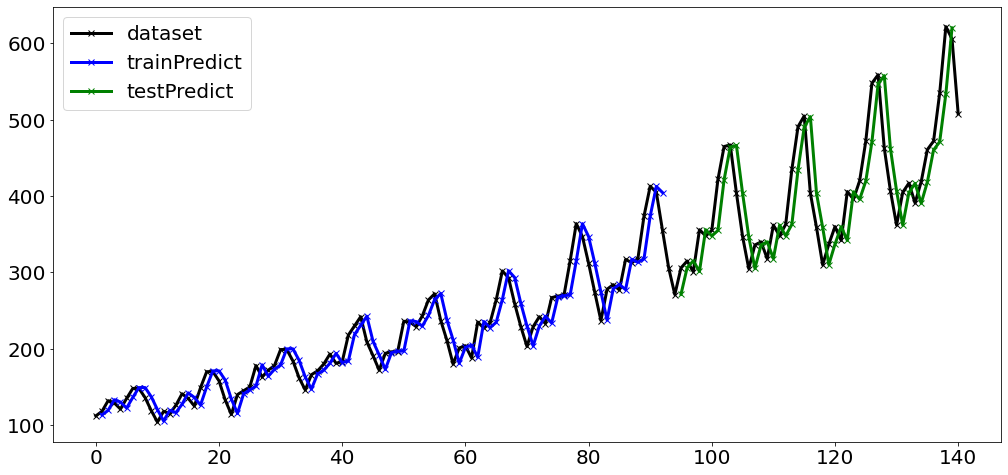

In [11]:
# plot baseline and predictions
plt.plot(dataset, "kx-", lw = 3, label = "dataset")
plt.plot(trainPredictPlot, "bx-", lw = 3, label = "trainPredict")
plt.plot(testPredictPlot, "gx-", lw = 3, label = "testPredict")
plt.legend()
plt.show()

# Multilayer Perceptron Using the Window Method


- We can also phrase the problem so that multiple recent time steps can be used to make the prediction for the next time step. 
- This is called the **window method**, and the size of the window is a parameter that can be tuned for each problem. 
- For example, given the current time (t) we want to predict the value at the next time in the sequence (t+1), we can use the current time (t) as well as the two prior times (t-1 and t-2). 
- When phrased as a regression problem the input variables are t-2, t-1, t and the output variable is t+1



In [12]:
dataset = getDataset()

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

# reshape dataset
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

94 47


In [53]:
train.shape

(94, 1)

In [14]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= "relu" ))
model.add(Dense(1))

model.compile(loss= "mean_squared_error" , optimizer= "adam")
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
42/42 - 1s - loss: 70877.9453
Epoch 2/200
42/42 - 0s - loss: 53787.1133
Epoch 3/200
42/42 - 0s - loss: 38097.1367
Epoch 4/200
42/42 - 0s - loss: 23249.6133
Epoch 5/200
42/42 - 0s - loss: 11868.7939
Epoch 6/200
42/42 - 0s - loss: 5162.3291
Epoch 7/200
42/42 - 0s - loss: 2225.8853
Epoch 8/200
42/42 - 0s - loss: 1430.2494
Epoch 9/200
42/42 - 0s - loss: 1241.1766
Epoch 10/200
42/42 - 0s - loss: 1220.4476
Epoch 11/200
42/42 - 0s - loss: 1224.6100
Epoch 12/200
42/42 - 0s - loss: 1215.1516
Epoch 13/200
42/42 - 0s - loss: 1210.3601
Epoch 14/200
42/42 - 0s - loss: 1225.1663
Epoch 15/200
42/42 - 0s - loss: 1204.0035
Epoch 16/200
42/42 - 0s - loss: 1201.3066
Epoch 17/200
42/42 - 0s - loss: 1196.1210
Epoch 18/200
42/42 - 0s - loss: 1210.8196
Epoch 19/200
42/42 - 0s - loss: 1184.7303
Epoch 20/200
42/42 - 0s - loss: 1186.7534
Epoch 21/200
42/42 - 0s - loss: 1189.8805
Epoch 22/200
42/42 - 0s - loss: 1188.3986
Epoch 23/200
42/42 - 0s - loss: 1171.4645
Epoch 24/200
42/42 - 0s - loss: 1175.5

42/42 - 0s - loss: 412.3168
Epoch 198/200
42/42 - 0s - loss: 421.7429
Epoch 199/200
42/42 - 0s - loss: 408.0326
Epoch 200/200
42/42 - 0s - loss: 414.5203


In [15]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print("Train Score: %.2f MSE (%.2f RMSE)"  % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print("Test Score: %.2f MSE (%.2f RMSE)"  % (testScore, math.sqrt(testScore)))

Train Score: 384.49 MSE (19.61 RMSE)
Test Score: 1706.10 MSE (41.30 RMSE)


In [16]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

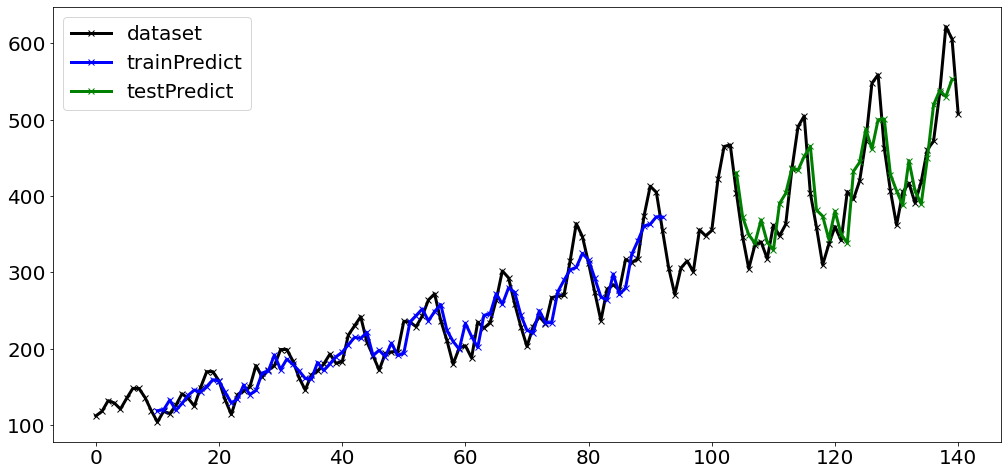

In [17]:
# plot baseline and predictions
plt.plot(dataset, "kx-", lw = 3, label = "dataset")
plt.plot(trainPredictPlot, "bx-", lw = 3, label = "trainPredict")
plt.plot(testPredictPlot, "gx-", lw = 3, label = "testPredict")
plt.legend()
plt.show()

# LSTM Network For Regression

In [60]:
dataset = getDataset()

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [61]:
train.shape

(94, 1)

In [62]:
trainX.shape

(92, 1, 1)

In [19]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim = look_back))
#model.add(LSTM(4, input_shape = (1, look_back)))

model.add(Dense(1))
model.compile(loss= "mean_squared_error" , optimizer= "adam" )
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
92/92 - 4s - loss: 0.0557
Epoch 2/100
92/92 - 0s - loss: 0.0282
Epoch 3/100
92/92 - 0s - loss: 0.0215
Epoch 4/100
92/92 - 0s - loss: 0.0197
Epoch 5/100
92/92 - 0s - loss: 0.0186
Epoch 6/100
92/92 - 0s - loss: 0.0177
Epoch 7/100
92/92 - 0s - loss: 0.0167
Epoch 8/100
92/92 - 0s - loss: 0.0158
Epoch 9/100
92/92 - 0s - loss: 0.0149
Epoch 10/100
92/92 - 0s - loss: 0.0140
Epoch 11/100
92/92 - 0s - loss: 0.0131
Epoch 12/100
92/92 - 0s - loss: 0.0122
Epoch 13/100
92/92 - 0s - loss: 0.0113
Epoch 14/100
92/92 - 0s - loss: 0.0104
Epoch 15/100
92/92 - 0s - loss: 0.0097
Epoch 16/100
92/92 - 0s - loss: 0.0087
Epoch 17/100
92/92 - 0s - loss: 0.0079
Epoch 18/100
92/92 - 0s - loss: 0.0071
Epoch 19/100
92/92 - 0s - loss: 0.0064
Epoch 20/100
92/92 - 0s - loss: 0.0057
Epoch 21/100
92/92 - 0s - loss: 0.0050
Epoch 22/100
92/92 - 0s - loss: 0.0044
Epoch 23/100
92/92 - 0s - loss: 0.0039
Epoch 24/100
92/92 - 0s - loss: 0.0034
Epoch 25/100
92/92 - 0s - loss: 0.0031
Epoch 26/100
92/92 - 0s - loss: 0.

In [20]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [21]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE"  % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Test Score: %.2f RMSE"  % (testScore))

Train Score: 22.31 RMSE
Test Score: 49.64 RMSE


In [22]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

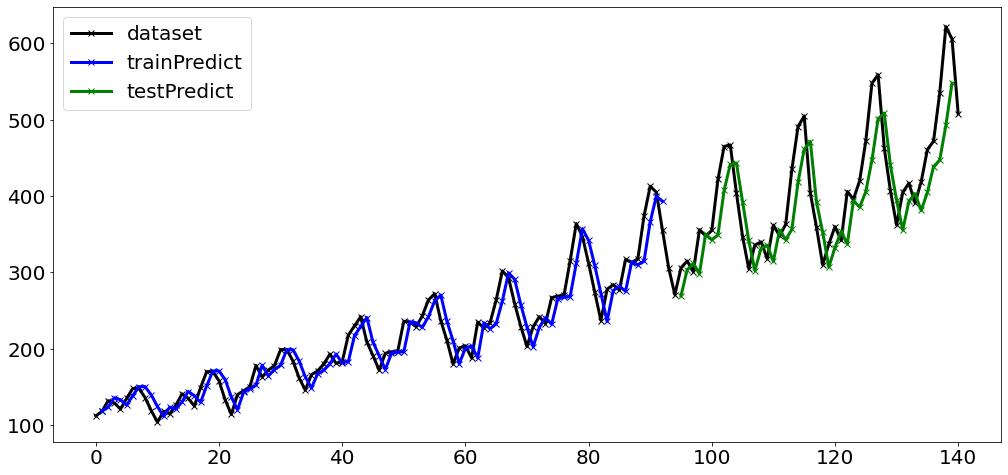

In [23]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), "kx-", lw = 3, label = "dataset")
plt.plot(trainPredictPlot, "bx-", lw = 3, label = "trainPredict")
plt.plot(testPredictPlot, "gx-", lw = 3, label = "testPredict")
plt.legend()
plt.show()

## How do you make prediction into the future?


- So far we have compared our predictions aganist the test set.
- What if we want to predict into the future?
- This what we are going to do now. **I still have to do!**



In [19]:
testX

array([[271.],
       [306.],
       [315.],
       [301.],
       [356.],
       [348.],
       [355.],
       [422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.]], dtype=float32)

In [ ]:
testPredict = model.predict(testX)

# LSTM For Regression Using the Window Method

In [24]:
dataset = getDataset()

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size

train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [54]:
trainX.shape

(90, 3, 1)

In [25]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss= "mean_squared_error" , optimizer= "adam" )
model.fit(trainX, trainY, epochs = 100, batch_size=1, verbose=2)

Epoch 1/100
90/90 - 2s - loss: 0.0362
Epoch 2/100
90/90 - 0s - loss: 0.0134
Epoch 3/100
90/90 - 0s - loss: 0.0101
Epoch 4/100
90/90 - 0s - loss: 0.0087
Epoch 5/100
90/90 - 0s - loss: 0.0072
Epoch 6/100
90/90 - 0s - loss: 0.0060
Epoch 7/100
90/90 - 0s - loss: 0.0051
Epoch 8/100
90/90 - 0s - loss: 0.0044
Epoch 9/100
90/90 - 0s - loss: 0.0038
Epoch 10/100
90/90 - 0s - loss: 0.0034
Epoch 11/100
90/90 - 0s - loss: 0.0032
Epoch 12/100
90/90 - 0s - loss: 0.0030
Epoch 13/100
90/90 - 0s - loss: 0.0029
Epoch 14/100
90/90 - 0s - loss: 0.0029
Epoch 15/100
90/90 - 0s - loss: 0.0028
Epoch 16/100
90/90 - 0s - loss: 0.0027
Epoch 17/100
90/90 - 0s - loss: 0.0028
Epoch 18/100
90/90 - 0s - loss: 0.0028
Epoch 19/100
90/90 - 0s - loss: 0.0027
Epoch 20/100
90/90 - 0s - loss: 0.0027
Epoch 21/100
90/90 - 0s - loss: 0.0027
Epoch 22/100
90/90 - 0s - loss: 0.0026
Epoch 23/100
90/90 - 0s - loss: 0.0026
Epoch 24/100
90/90 - 0s - loss: 0.0026
Epoch 25/100
90/90 - 0s - loss: 0.0026
Epoch 26/100
90/90 - 0s - loss: 0.

In [26]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE"  % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Test Score: %.2f RMSE"  % (testScore))

Train Score: 22.60 RMSE
Test Score: 48.88 RMSE


In [27]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

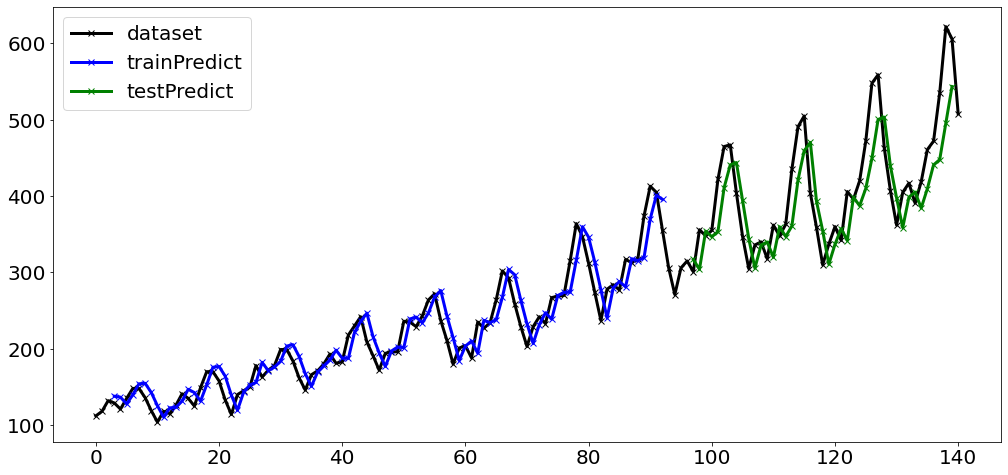

In [28]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), "kx-", lw = 3, label = "dataset")
plt.plot(trainPredictPlot, "bx-", lw = 3, label = "trainPredict")
plt.plot(testPredictPlot, "gx-", lw = 3, label = "testPredict")
plt.legend()
plt.show()

# LSTM For Regression with Time Steps

In [29]:
dataset = getDataset()
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [30]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=1))
model.add(Dense(1))
model.compile(loss= "mean_squared_error" , optimizer= "adam" )
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
90/90 - 2s - loss: 0.0228
Epoch 2/100
90/90 - 0s - loss: 0.0092
Epoch 3/100
90/90 - 0s - loss: 0.0077
Epoch 4/100
90/90 - 0s - loss: 0.0068
Epoch 5/100
90/90 - 0s - loss: 0.0058
Epoch 6/100
90/90 - 0s - loss: 0.0051
Epoch 7/100
90/90 - 0s - loss: 0.0046
Epoch 8/100
90/90 - 0s - loss: 0.0042
Epoch 9/100
90/90 - 0s - loss: 0.0038
Epoch 10/100
90/90 - 0s - loss: 0.0037
Epoch 11/100
90/90 - 0s - loss: 0.0036
Epoch 12/100
90/90 - 0s - loss: 0.0035
Epoch 13/100
90/90 - 0s - loss: 0.0034
Epoch 14/100
90/90 - 0s - loss: 0.0035
Epoch 15/100
90/90 - 0s - loss: 0.0034
Epoch 16/100
90/90 - 0s - loss: 0.0034
Epoch 17/100
90/90 - 0s - loss: 0.0034
Epoch 18/100
90/90 - 0s - loss: 0.0035
Epoch 19/100
90/90 - 0s - loss: 0.0034
Epoch 20/100
90/90 - 0s - loss: 0.0034
Epoch 21/100
90/90 - 0s - loss: 0.0034
Epoch 22/100
90/90 - 0s - loss: 0.0033
Epoch 23/100
90/90 - 0s - loss: 0.0033
Epoch 24/100
90/90 - 0s - loss: 0.0033
Epoch 25/100
90/90 - 0s - loss: 0.0034
Epoch 26/100
90/90 - 0s - loss: 0.

In [31]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [32]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE"  % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Test Score: %.2f RMSE"  % (testScore))

Train Score: 24.35 RMSE
Test Score: 50.59 RMSE


In [33]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

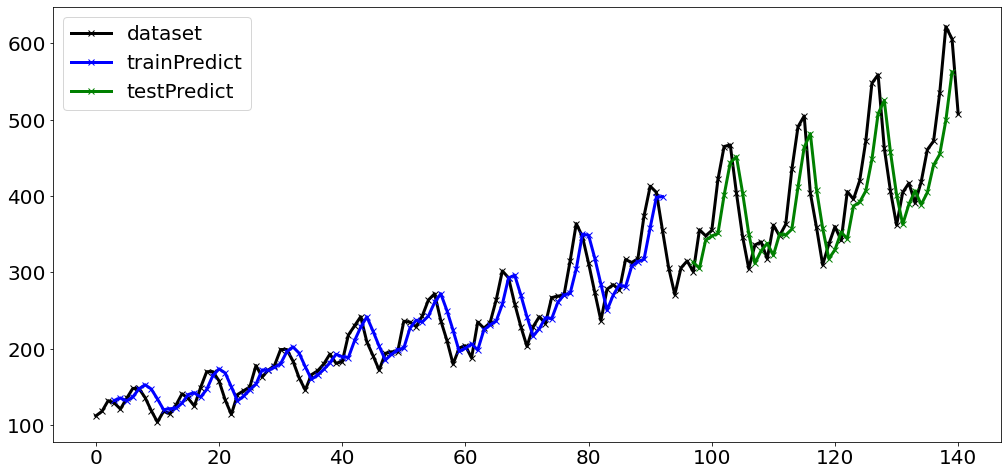

In [34]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), "kx-", lw = 3, label = "dataset")
plt.plot(trainPredictPlot, "bx-", lw = 3, label = "trainPredict")
plt.plot(testPredictPlot, "gx-", lw = 3, label = "testPredict")
plt.legend()
plt.show()

# LSTM With Memory Between Batches


- The LSTM network has memory which is capable of remembering across long sequences.
- We can gain finer control over when the internal state of the LSTM network is cleared in Keras by making the LSTM layer stateful. 
- This means that it can build state over the entire training sequence and even maintain that state if needed to make predictions.



In [35]:
dataset = getDataset()

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [36]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss = "mean_squared_error" , optimizer = "adam")
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

90/90 - 1s - loss: 0.0045
90/90 - 0s - loss: 0.0132
90/90 - 0s - loss: 0.0091
90/90 - 0s - loss: 0.0067
90/90 - 0s - loss: 0.0054
90/90 - 0s - loss: 0.0048
90/90 - 0s - loss: 0.0047
90/90 - 0s - loss: 0.0046
90/90 - 0s - loss: 0.0046
90/90 - 0s - loss: 0.0046
90/90 - 0s - loss: 0.0046
90/90 - 0s - loss: 0.0045
90/90 - 0s - loss: 0.0045
90/90 - 0s - loss: 0.0045
90/90 - 0s - loss: 0.0044
90/90 - 0s - loss: 0.0044
90/90 - 0s - loss: 0.0044
90/90 - 0s - loss: 0.0044
90/90 - 0s - loss: 0.0043
90/90 - 0s - loss: 0.0043
90/90 - 0s - loss: 0.0043
90/90 - 0s - loss: 0.0042
90/90 - 0s - loss: 0.0042
90/90 - 0s - loss: 0.0042
90/90 - 0s - loss: 0.0042
90/90 - 0s - loss: 0.0041
90/90 - 0s - loss: 0.0041
90/90 - 0s - loss: 0.0041
90/90 - 0s - loss: 0.0041
90/90 - 0s - loss: 0.0040
90/90 - 0s - loss: 0.0040
90/90 - 0s - loss: 0.0040
90/90 - 0s - loss: 0.0040
90/90 - 0s - loss: 0.0039
90/90 - 0s - loss: 0.0039
90/90 - 0s - loss: 0.0039
90/90 - 0s - loss: 0.0039
90/90 - 0s - loss: 0.0038
90/90 - 0s -

In [37]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [38]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE"  % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Test Score: %.2f RMSE"  % (testScore))

Train Score: 25.88 RMSE
Test Score: 52.42 RMSE


In [39]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
                                                                                            

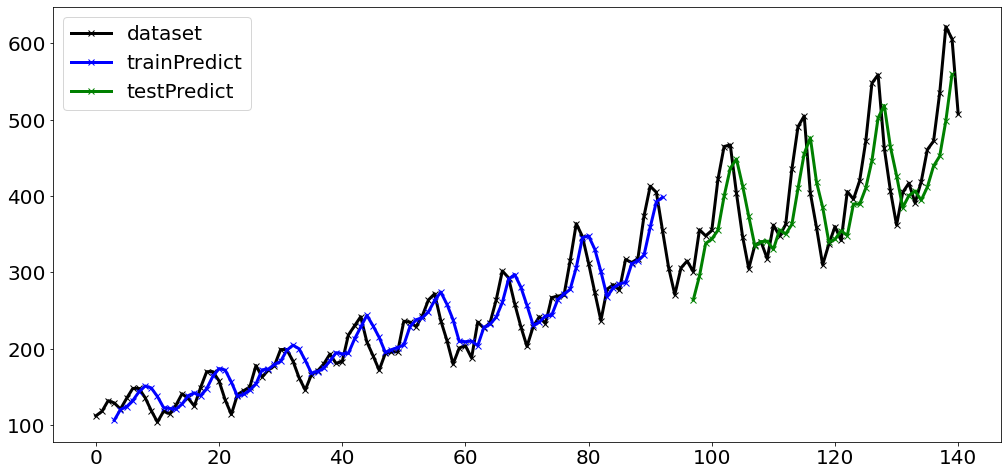

In [40]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), "kx-", lw = 3, label = "dataset")
plt.plot(trainPredictPlot, "bx-", lw = 3, label = "trainPredict")
plt.plot(testPredictPlot, "gx-", lw = 3, label = "testPredict")
plt.legend()
plt.show()


- We do see that results are worse. 
- The model may need more modules and may need to be trained for more epochs to internalize the structure of thee problem.
- We'll try this in the next section. 



# Stacked LSTMs With Memory Between Batches


- Finally, we will take a look at one of the big benefits of LSTMs, the fact that they can be successfully trained when stacked into deep network architectures



In [41]:
dataset = getDataset()

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [42]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True,
    return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss= "mean_squared_error" , optimizer= "adam")
for i in range(100):
    model.fit(trainX, trainY, epochs =1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

90/90 - 3s - loss: 0.0049
90/90 - 0s - loss: 0.0105
90/90 - 0s - loss: 0.0075
90/90 - 0s - loss: 0.0062
90/90 - 0s - loss: 0.0058
90/90 - 0s - loss: 0.0057
90/90 - 0s - loss: 0.0057
90/90 - 0s - loss: 0.0057
90/90 - 0s - loss: 0.0057
90/90 - 0s - loss: 0.0057
90/90 - 0s - loss: 0.0057
90/90 - 0s - loss: 0.0057
90/90 - 0s - loss: 0.0057
90/90 - 0s - loss: 0.0057
90/90 - 0s - loss: 0.0057
90/90 - 0s - loss: 0.0056
90/90 - 0s - loss: 0.0056
90/90 - 0s - loss: 0.0056
90/90 - 0s - loss: 0.0056
90/90 - 0s - loss: 0.0056
90/90 - 0s - loss: 0.0056
90/90 - 0s - loss: 0.0055
90/90 - 0s - loss: 0.0055
90/90 - 0s - loss: 0.0055
90/90 - 0s - loss: 0.0055
90/90 - 0s - loss: 0.0054
90/90 - 0s - loss: 0.0054
90/90 - 0s - loss: 0.0054
90/90 - 0s - loss: 0.0053
90/90 - 0s - loss: 0.0053
90/90 - 0s - loss: 0.0053
90/90 - 0s - loss: 0.0052
90/90 - 0s - loss: 0.0052
90/90 - 0s - loss: 0.0052
90/90 - 0s - loss: 0.0051
90/90 - 0s - loss: 0.0051
90/90 - 0s - loss: 0.0050
90/90 - 0s - loss: 0.0050
90/90 - 0s -

In [43]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [44]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE"  % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Test Score: %.2f RMSE"  % (testScore))

Train Score: 21.18 RMSE
Test Score: 61.14 RMSE


In [45]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

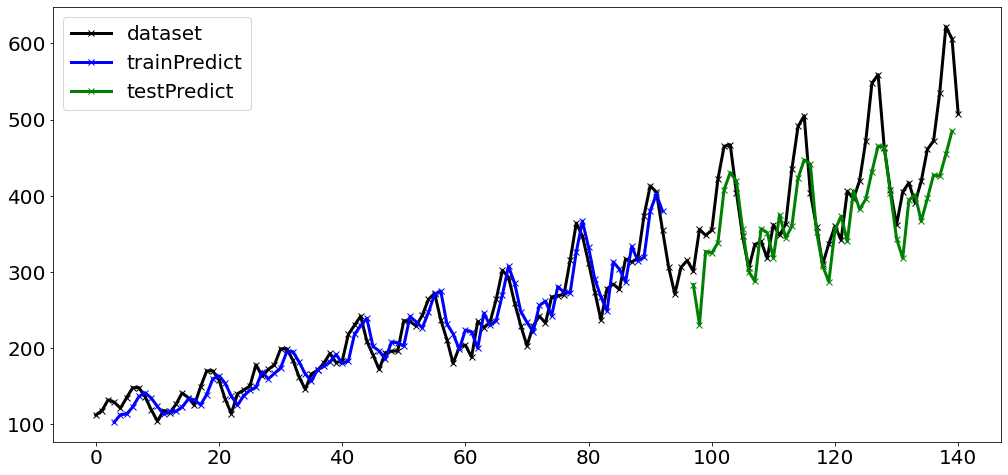

In [46]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), "kx-", lw = 3, label = "dataset")
plt.plot(trainPredictPlot, "bx-", lw = 3, label = "trainPredict")
plt.plot(testPredictPlot, "gx-", lw = 3, label = "testPredict")
plt.legend()
plt.show()


- The predictions on the test dataset are again worse. 
- This is more evidence to suggest the need for additional training epochs.  



# Let us train for more epoches

In [47]:
dataset = getDataset()

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [48]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True,
    return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss= "mean_squared_error" , optimizer= "adam")

for i in range(300):
    model.fit(trainX, trainY, epochs =1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

90/90 - 4s - loss: 0.0045
90/90 - 0s - loss: 0.0075
90/90 - 0s - loss: 0.0061
90/90 - 0s - loss: 0.0055
90/90 - 0s - loss: 0.0052
90/90 - 0s - loss: 0.0051
90/90 - 0s - loss: 0.0051
90/90 - 0s - loss: 0.0051
90/90 - 0s - loss: 0.0050
90/90 - 0s - loss: 0.0050
90/90 - 0s - loss: 0.0050
90/90 - 0s - loss: 0.0050
90/90 - 0s - loss: 0.0049
90/90 - 0s - loss: 0.0049
90/90 - 0s - loss: 0.0049
90/90 - 0s - loss: 0.0048
90/90 - 0s - loss: 0.0048
90/90 - 0s - loss: 0.0048
90/90 - 0s - loss: 0.0047
90/90 - 0s - loss: 0.0047
90/90 - 0s - loss: 0.0046
90/90 - 0s - loss: 0.0045
90/90 - 0s - loss: 0.0045
90/90 - 0s - loss: 0.0044
90/90 - 0s - loss: 0.0044
90/90 - 0s - loss: 0.0043
90/90 - 0s - loss: 0.0043
90/90 - 0s - loss: 0.0042
90/90 - 0s - loss: 0.0042
90/90 - 0s - loss: 0.0041
90/90 - 0s - loss: 0.0041
90/90 - 0s - loss: 0.0040
90/90 - 0s - loss: 0.0039
90/90 - 0s - loss: 0.0039
90/90 - 0s - loss: 0.0038
90/90 - 0s - loss: 0.0037
90/90 - 0s - loss: 0.0036
90/90 - 0s - loss: 0.0035
90/90 - 0s -

In [49]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [50]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: %.2f RMSE"  % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Test Score: %.2f RMSE"  % (testScore))

Train Score: 16.11 RMSE
Test Score: 60.84 RMSE


In [51]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

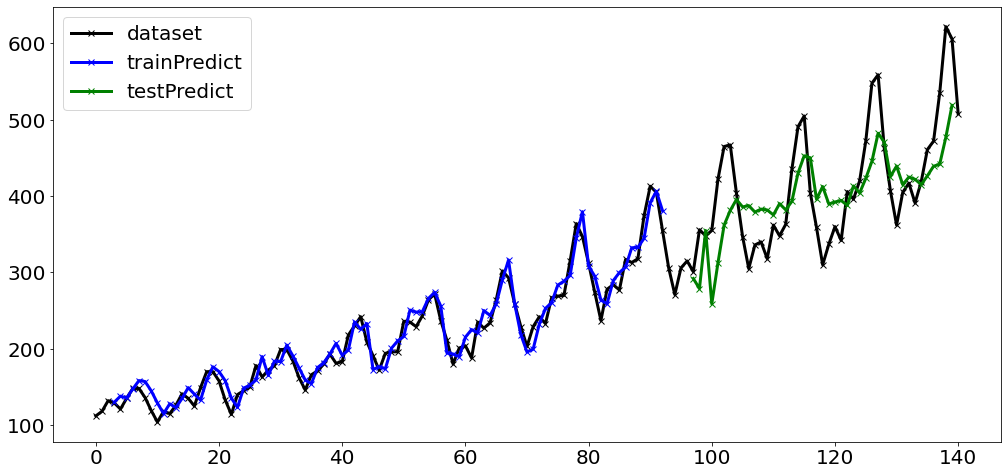

In [52]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), "kx-", lw = 3, label = "dataset")
plt.plot(trainPredictPlot, "bx-", lw = 3, label = "trainPredict")
plt.plot(testPredictPlot, "gx-", lw = 3, label = "testPredict")
plt.legend()
plt.show()

# References
<hr style="border:2px solid black"> </hr>


- https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

